## Notebook for Figure 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# importing the TDigest package
from crick import TDigest

Creating 6 random data sets of different lengths

In [2]:
data1 = np.random.rand(50)
data2 = np.random.rand(100)
data3 = np.random.rand(200)
data4 = np.random.rand(350)
data5 = np.random.rand(500)
data6 = np.random.rand(1000)

Adding the random data sets to TDigest objects with different compression factors to see how many clusters / centroids are created with each compression factor

In [3]:
# range of compression factors to test
min_comp = 20
max_comp = 140

spacing = 2 

compressions = np.linspace(min_comp, max_comp, int((max_comp - min_comp)/spacing)+1)
num_compressions = len(compressions)

# initalising empty vectors for the different data sets
digest_list = []
digest_list2 = []
digest_list3 = []
digest_list4 = []
digest_list5 = []
digest_list6 = []
digest_size = np.zeros([num_compressions, 6])

# for each data set, creating a TDigest object over the range of different compressions
for kl in range(num_compressions):
    digest_list.append(TDigest(compression=compressions[kl]))
    digest_list2.append(TDigest(compression=compressions[kl]))
    digest_list3.append(TDigest(compression=compressions[kl]))
    digest_list4.append(TDigest(compression=compressions[kl]))
    digest_list5.append(TDigest(compression=compressions[kl]))
    digest_list6.append(TDigest(compression=compressions[kl]))

    digest_list[kl].update(data1)
    digest_list2[kl].update(data2)
    digest_list3[kl].update(data3)
    digest_list4[kl].update(data4)
    digest_list5[kl].update(data5)
    digest_list6[kl].update(data6)
    
    # extracting the number of centroids created for each compression
    digest_size[kl, 0] = len(digest_list[kl].centroids())
    digest_size[kl, 1] = len(digest_list2[kl].centroids())
    digest_size[kl, 2] = len(digest_list3[kl].centroids())
    digest_size[kl, 3] = len(digest_list4[kl].centroids())
    digest_size[kl, 4] = len(digest_list5[kl].centroids())
    digest_size[kl, 5] = len(digest_list6[kl].centroids())

Calculating the memory required in kB based on the number of centroids, each requiring a mean and a weight with 8 B of storage for each

In [4]:
mem = (digest_size[:,-1]*2*8)/1000 # kB

Plotting

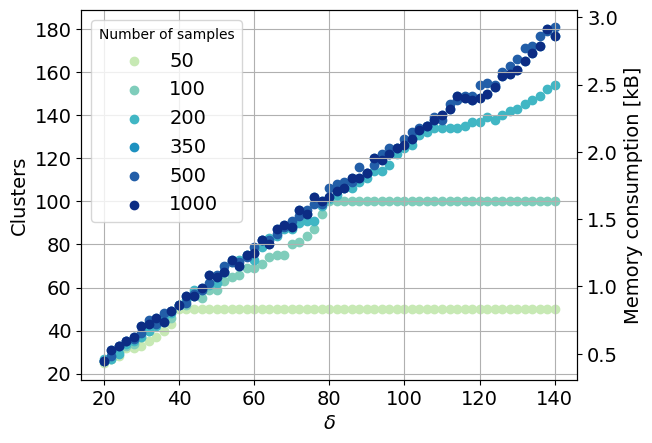

In [5]:
fs = 14
c1 = '#c7e9b4'
c2 = '#7fcdbb'
c3 = '#41b6c4'
c4 = '#1d91c0'
c5 = '#225ea8'
c6 = '#0c2c84'

fig, ax1 = plt.subplots()
# Create a scatter plot
ax1.scatter(compressions, digest_size[:,0], color = c1, label = '50')
ax1.scatter(compressions, digest_size[:,1], color = c2, label = '100')
ax1.scatter(compressions, digest_size[:,2], color = c3, label = '200')
ax1.scatter(compressions, digest_size[:,3], color = c4, label = '350')
ax1.scatter(compressions, digest_size[:,4], color = c5, label = '500')
ax1.scatter(compressions, digest_size[:,3], color = c6, label = '1000')

# Add labels and title
ax1.set_xlabel(r'$\delta$', fontsize = fs)
ax1.set_ylabel('Clusters', fontsize = fs)
ax1.tick_params(axis='y', labelcolor='black', labelsize = fs)
ax1.tick_params(axis='x', labelcolor='black', labelsize = fs)
ax1.legend(fontsize = fs, title = 'Number of samples')
ax1.grid(True) 

# Create the second y-axis scatter plot
ax2 = ax1.twinx()
ax2.scatter(compressions, mem, marker = '')
ax2.set_ylabel('Memory consumption [kB]', color='black', fontsize = fs)
ax2.tick_params(axis='y', labelcolor='black', labelsize = fs)

# Show the plot
plt.show()